# Setup

In [1]:
# Import library
import os
import warnings
import pandas as pd

import function.visualization as vis
import function.imbalance as imb
import function.classification as cls

from sklearn import tree
from subprocess import check_call

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

In [2]:
# Set directory
input_file = "data_set/data_for_student_case.csv"
figure_directory = "figure/"
dot_file = figure_directory + "tree.dot"
figure_white_box = figure_directory + "tree.png"

# Create figure directory
if not os.path.exists(figure_directory):
    print('Creating directory for figures...')
    os.makedirs(figure_directory)

# Data Understanding

In [3]:
# Load input data
data_set = pd.read_csv(input_file)

In [4]:
# Show number of rows and columns
print("Number of rows\t\t: {}".format(data_set.shape[0]))
print("Number of columns\t: {}".format(data_set.shape[1]))
#data_set.shape

Number of rows		: 290382
Number of columns	: 17


In [5]:
# Show further information
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290382 entries, 0 to 290381
Data columns (total 17 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null object
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id  

In [6]:
# Show sample records
data_set.head()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271


In [7]:
# Generate descrpitive statistics
data_set.describe()

,txid,bin,amount,cvcresponsecode
count,290382.000000,290242.000000,2.903820e+05,290382.000000
mean,279916.750673,485254.586238,2.936462e+04,0.769004
std,138437.214796,37015.528140,6.829927e+04,0.508933
min,1.000000,400000.000000,5.000000e+01,0.000000
25%,218232.250000,462239.000000,4.400000e+03,0.000000
50%,304071.500000,475139.000000,7.095000e+03,1.000000
75%,387592.750000,518652.000000,1.589500e+04,1.000000
max,482734.000000,676883.000000,2.785840e+06,5.000000


# Data Pre-processing

In [8]:
# Clean the data
data_set = data_set.dropna()
data_set = data_set[data_set.simple_journal != "Refused"]

In [9]:
# Change data type
for column in ['bookingdate', 'creationdate']:
    data_set[column] = pd.to_datetime(data_set.bookingdate, format='%Y-%m-%d %H:%M:%S', 
                                      errors='coerce')

for column in ['issuercountrycode', 'txvariantcode', 'currencycode', 'shoppercountrycode', 
               'shopperinteraction', 'cardverificationcodesupplied', 'cvcresponsecode', 
               'accountcode']:
    data_set[column] = data_set[column].astype('category')

In [10]:
# Check the result
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223510 entries, 0 to 290381
Data columns (total 17 columns):
txid                            223510 non-null int64
bookingdate                     223510 non-null datetime64[ns]
issuercountrycode               223510 non-null category
txvariantcode                   223510 non-null category
bin                             223510 non-null float64
amount                          223510 non-null float64
currencycode                    223510 non-null category
shoppercountrycode              223510 non-null category
shopperinteraction              223510 non-null category
simple_journal                  223510 non-null object
cardverificationcodesupplied    223510 non-null category
cvcresponsecode                 223510 non-null category
creationdate                    223510 non-null datetime64[ns]
accountcode                     223510 non-null category
mail_id                         223510 non-null object
ip_id                          

# Visualization Task

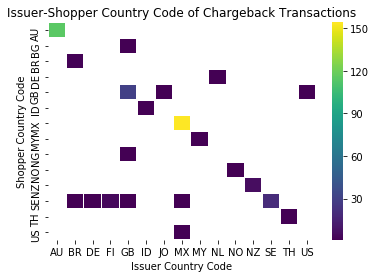

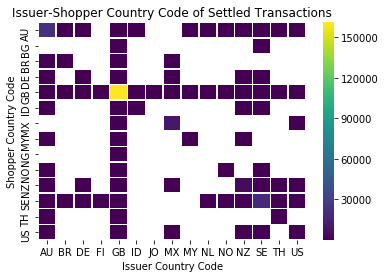

In [11]:
# Visualize the data using heat map
vis.heatmap(data_set, 'Chargeback', 'Issuer-Shopper Country Code of Chargeback Transactions',
                      figure_directory + 'heatmap_chargeback.png')
vis.heatmap(data_set, 'Settled', 'Issuer-Shopper Country Code of Settled Transactions',
                      figure_directory + 'heatmap_settled.png')

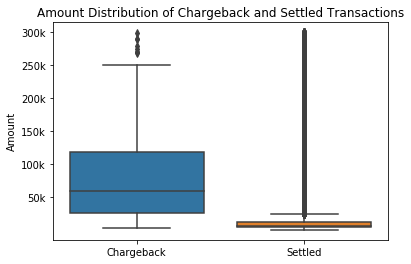

In [12]:
# Visualize the data using box plot
vis.boxplot(data_set, 'Amount Distribution of Chargeback and Settled Transactions',
                      figure_directory + 'boxplot_amount.png')

# Imbalance Task

In [13]:
# Data preparation
subset = data_set[['issuercountrycode', 'txvariantcode', 'amount', 'currencycode', 
                   'shoppercountrycode', 'shopperinteraction', 'cardverificationcodesupplied', 
                   'cvcresponsecode', 'accountcode', 'simple_journal']]

subset.loc[subset.simple_journal == 'Chargeback', 'simple_journal'] = 1
subset.loc[subset.simple_journal == 'Settled', 'simple_journal'] = 0
subset['simple_journal'] = subset['simple_journal'].astype('int')

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Determine label and input feature
label = subset.simple_journal

feature = subset.drop('simple_journal', axis=1)
feature = pd.get_dummies(feature)

In [16]:
# Split training and test set
feature_train, feature_test, label_train, label_test = train_test_split(feature, 
                                                                        label, 
                                                                        test_size=0.5,
                                                                        random_state=42, 
                                                                        stratify=label)

In [17]:
# Perform oversampling using SMOTE
oversampling = SMOTE(ratio=float(0.5), random_state=42)
feature_oversampling, label_oversampling = oversampling.fit_sample(feature_train, label_train)

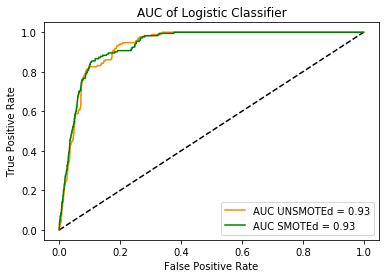

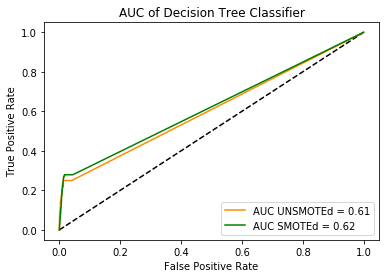

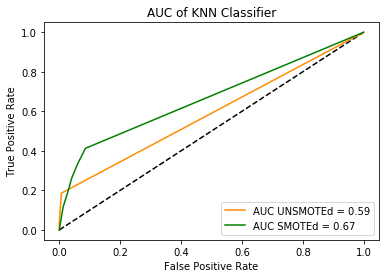

In [18]:
# Generate ROC curves with different classifiers
imb.compare_roc(LogisticRegression(), 'AUC of Logistic Classifier', 
                figure_directory + 'roc_logistic.png', feature_train, 
                feature_test, feature_oversampling, label_train, label_test, 
                label_oversampling)

imb.compare_roc(tree.DecisionTreeClassifier(), 'AUC of Decision Tree Classifier', 
                figure_directory + 'roc_decision_tree.png', feature_train, 
                feature_test, feature_oversampling, label_train, label_test, 
                label_oversampling)

imb.compare_roc(KNeighborsClassifier(n_neighbors=5), 'AUC of KNN Classifier', 
                figure_directory + 'roc_knn.png', feature_train, feature_test, 
                feature_oversampling, label_train, label_test, label_oversampling)

# Classification Task

In [19]:
# Data preparation
columns = ['issuercountrycode', 'txvariantcode', 'amount', 'currencycode', 
           'shoppercountrycode', 'shopperinteraction', 'cardverificationcodesupplied', 
           'cvcresponsecode', 'accountcode', 'simple_journal']
subset = data_set[columns]
print("Number of columns: {}".format(len(subset.columns)))

subset.loc[subset.simple_journal == 'Chargeback', 'simple_journal'] = 1
subset.loc[subset.simple_journal == 'Settled', 'simple_journal'] = 0
subset['simple_journal'] = subset['simple_journal'].astype('int')

Number of columns: 10


In [20]:
# Determine label and input feature
label = subset.simple_journal

feature = subset.drop('simple_journal', axis=1)
feature = pd.get_dummies(feature)

## Black-box classifier

In [21]:
# Set algorithm
algorithm = LogisticRegression()

# Evaluate using cross-validation
tp, fp, tn, fn, auc = cls.cross_validation(algorithm, feature, label, 10)
cls.evaluation_result(tp, fp, tn, fn, auc)

True positives	: 18
False positives	: 868
True negatives	: 21448
False negatives	: 17

Accuracy	: 0.960
Sensitivity	: 0.502
Specificity	: 0.961
Precision	: 0.020
F-measure	: 0.038
AUC		: 0.928


## White-box classifier

In [22]:
# Set algorithm
algorithm = tree.DecisionTreeClassifier()

# Evaluate using cross-validation
tp, fp, tn, fn, auc = cls.cross_validation(algorithm, feature, label, 10)
cls.evaluation_result(tp, fp, tn, fn, auc)

True positives	: 5
False positives	: 159
True negatives	: 22158
False negatives	: 29

Accuracy	: 0.992
Sensitivity	: 0.153
Specificity	: 0.993
Precision	: 0.031
F-measure	: 0.052
AUC		: 0.670


In [23]:
# Visualize the white-box
algorithm.fit(feature, label)
tree.export_graphviz(algorithm, out_file=dot_file, max_depth=3)
check_call(['dot', '-Tpng', dot_file, '-o', figure_white_box])
# limit the depth for pretty visualization

0

![title](figure/tree.png)